<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw03_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

##Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [0]:
import numpy as np
import scipy.stats as ss

In [0]:
class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [0]:
def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [0]:
import matplotlib.pyplot as plt

In [0]:
gbm1 = Gbm(init_state = 100,#initial:100
           drift_ratio = .0475,#interest rate: 4.75%
           vol_ratio = 0.2#volatility fixed at 20%
              )
option1 = VanillaOption(
    otype = 1,#call option
    strike = 110.,#strike: 110
)

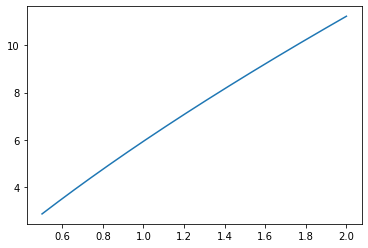

In [8]:
option1.maturity = np.arange(0.5, 2.01, 0.01)
plt.plot(option1.maturity, gbm1.bsm_price(option1))
plt.show()

We observed that for fixed market volatility, the price of a calloption increases as maturity increases.  

##Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

In [0]:
gbm2 = Gbm(init_state = 100,#initial:100
           drift_ratio = .0475,#interest rate: 4.75%
              )
option2 = VanillaOption(
    otype = 1,#call option
    strike = 110.,#strike: 110
    maturity = 1#maturity fixed at 1
)

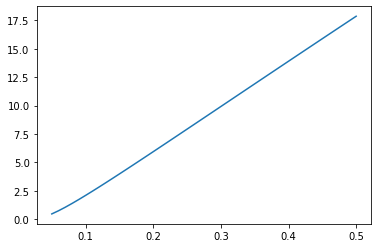

In [10]:
gbm2.vol_ratio = np.arange(0.05, 0.51, 0.01)
plt.plot(gbm2.vol_ratio, gbm2.bsm_price(option2))
plt.show()

We observe that for fixed option maturity, the price for the call option increases when the market volatility increases.

##Describe your observations. Do you think the same behavior is also true for put?

In [0]:
option3 = VanillaOption(
    otype = -1,#put option
    strike = 110.,#strike: 110
)

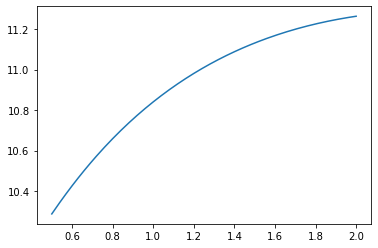

In [12]:
option3.maturity = np.arange(0.5, 2.01, 0.01)
plt.plot(option3.maturity, gbm1.bsm_price(option3))
plt.show()

In [0]:
option4 = VanillaOption(
    otype = -1,#put option
    strike = 110.,#strike: 110
    maturity = 1#maturity fixed at 1
)

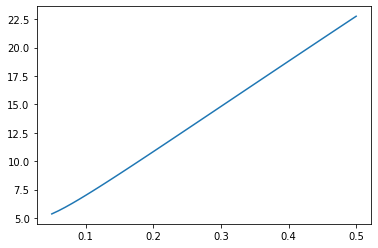

In [20]:
gbm2.vol_ratio = np.arange(0.05, 0.51, 0.01)
plt.plot(gbm2.vol_ratio, gbm2.bsm_price(option4))
plt.show()

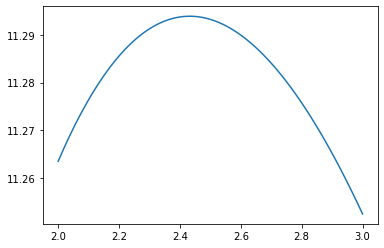

In [18]:
## If we change the interval of maturity T, we have a different observation 
option3.maturity = np.arange(2.0,3.01, 0.01)
plt.plot(option3.maturity, gbm1.bsm_price(option3))
plt.show()

#Conclusion and guess

According to the plot, we can conclude that under fix $\sigma$ but not fix $T$, it is true that we have same behavior for put option.  



##Could you prove your observations?

#Proof

Recall the BSM formula, we have

(1) $$C_0=S_0\phi(d_1)-Ke^{-rT}\phi(d_2)$$

(2)$$P_0=Ke^{-rT}\phi(-d_2)-S_0\phi(-d_1)$$

(3)$$d_1=\frac{(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}$$

(4)$$d_2=\frac{(r-\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}=d_1-\sigma\sqrt{T}$$

(5)$$C_0-P_0=S_0-e^{-rT}K$$

For call option, we take partial derivative of $C_{0}$ with respect to $\sigma$

$$\frac{\delta C_0}{\delta\sigma}=S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)(\frac{\delta d_1}{\delta\sigma}-\sqrt{T})$$

$$=(S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)\frac{\delta d_1}{\delta\sigma})+Ke^{-rT}\phi'(d_2)\sqrt{T}$$

and,

$$\phi'(d_1)=\frac{\delta}{\delta d_1}\int_{-\infty}^{d_1}{\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}dx=\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}$$

$$\phi'(d_2)=\frac{\delta}{\delta d_2}\int_{-\infty}^{d_2}{\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}dx=\frac{1}{\sqrt{2\pi}}e^{-\frac{d_2^2}{2}}$$

then, we have

$$S_0\phi'(d_1)\frac{\delta d_1}{\delta\sigma}-Ke^{-rT}\phi'(d_2)\frac{\delta d_1}{\delta\sigma}=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT}\frac{1}{\sqrt{2\pi}}e^{-\frac{(d_1-\sigma\sqrt{T})^2}{2}})$$

$$=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT}\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}})$$

$$=\frac{\delta d_1}{\delta\sigma}(S_0\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}-Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}})$$

In the exponent of $Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}}$, pluging equation (3) into the equation then we get:

$$-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}$$

$$=-rT-\frac{d_1^2}{2}+\frac{(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})}{\sigma\sqrt{T}}\sigma\sqrt{T}-\frac{\sigma^2T}{2}$$

$$=-rT-\frac{d_1^2}{2}+(r+\frac{1}{2}\sigma^2)T-ln(\frac{K}{S_0})-\frac{\sigma^2T}{2}$$

$$=-\frac{d_1^2}{2}-ln(\frac{K}{S_0})$$

Thus the term simplifies to 

$$Ke^{-rT-\frac{d_1^2}{2}+d_1\sigma\sqrt{T}-\frac{\sigma^2T}{2}}\frac{1}{\sqrt{2\pi}}=Ke^{-\frac{d_1^2}{2}-ln(\frac{K}{S_0})}\frac{1}{\sqrt{2\pi}}=S_0e^{-\frac{d_1^2}{2}}\frac{1}{\sqrt{2\pi}}$$

So we have

$$S_0\phi'(d_1)=Ke^{-rT}\phi'(d_2)$$

Then, 

$$\frac{\delta C_0}{\delta\sigma}=Ke^{-rT}\phi'(d_2)\sqrt{T}=S_0\phi'(d_1)\sqrt{T}$$

since $T>0$,

thus we have

$$\frac{\delta C_0}{\delta\sigma} > 0$$

Then, we take partial derivative of equation (5), we have

$$\frac{\delta C_0}{\delta\sigma}-\frac{\delta P_0}{\delta\sigma}=0$$

which means

$$\frac{\delta C_0}{\delta\sigma}=\frac{\delta P_0}{\delta\sigma}>0$$


Therefore when volatility increases, the prices of option increase. 
